In [2]:
import numpy as np
import scipy as sp
import matplotlib as mp
from matplotlib import pyplot as plt
import pandas as pd
import scienceplots
import os

In [3]:
prefix = '../results'

In [52]:
os.listdir(prefix)

['ssrb-bc-32.csv',
 'mrb-16.csv',
 'ssrb-bc-16.csv',
 'ssrb-bc-8.csv',
 'mrb-4.csv',
 'mrb-18.csv',
 'mrb-2.csv',
 'ssrb-bc-4.csv',
 'ssrb-bc-2.csv',
 'noqueue.csv',
 'mrb-8.csv',
 'ssrb.csv']

In [146]:
names = ['id', 'produced', 'consumed', 'spin_time', 'running_time', 'latency']
def import_csv(path):
    df = pd.read_csv(path, names=names)
    df_id = df.groupby('id').quantile(.5).reset_index()

    total_consumed = df_id.consumed.sum()
    total_produced = df_id.produced.iloc[0]
    total_spin_time = df_id.spin_time.sum()
    total_running_time = df_id.running_time.sum()

    throughput_mpps = total_consumed / 10000000
    p99_latency_us = df.latency.quantile(.99) / 1000
    spin_time_ratio = total_spin_time / total_running_time

    return throughput_mpps, p99_latency_us, spin_time_ratio

In [147]:
cols = ['throughput', 'latency', 'spinlock_ratio']

# SSRB

In [148]:
path = f"{prefix}/ssrb.csv"
data = [list(import_csv(path))]
df_ssrb = pd.DataFrame(data, columns=cols)
df_ssrb['variant'] = 'SSRB'
df_ssrb

,throughput,latency,spinlock_ratio,variant
0,0.547222,868.19,0.725698,SSRB


# NRB

In [149]:
path = f"{prefix}/noqueue.csv"
data = [list(import_csv(path))]
df_nrb = pd.DataFrame(data, columns=cols)
df_nrb['variant'] = 'NRB'
df_nrb

,throughput,latency,spinlock_ratio,variant
0,3.396241,4.999,0.0,NRB


# SSRB-BC

In [150]:
batches = [2, 4, 8, 16, 32]
dfs = []
for batch in batches:
    path = f"{prefix}/ssrb-bc-{batch}.csv"
    dfs.append([batch] + list(import_csv(path)))
    
df_ssrb_bc = pd.DataFrame(dfs, columns=['batch']+cols)
df_ssrb_bc['variant'] = 'SSRB-BC'
df_ssrb_bc

,batch,throughput,latency,spinlock_ratio,variant
0,2,0.682969,14.0,0.530680,SSRB-BC
1,4,3.358242,325.0,0.009358,SSRB-BC
2,8,3.349478,334.0,0.012134,SSRB-BC
3,16,3.370638,354.0,0.006046,SSRB-BC
4,32,3.370582,458.0,0.007002,SSRB-BC


# MRB

In [151]:
rings = [2, 4, 8, 18]
dfs = []
for ring in rings:
    path = f"{prefix}/mrb-{ring}.csv"
    dfs.append([ring] + list(import_csv(path)))

df_mrb = pd.DataFrame(dfs, columns=['rings']+cols)
df_mrb['variant'] = 'MRB'
df_mrb

,rings,throughput,latency,spinlock_ratio,variant
0,2,0.731828,13.00,0.386276,MRB
1,4,0.998534,9.00,0.121648,MRB
2,8,3.187647,2602.00,0.013132,MRB
3,18,3.393776,5154.54,0.000268,MRB


# Plots

In [154]:
fontsize = 16

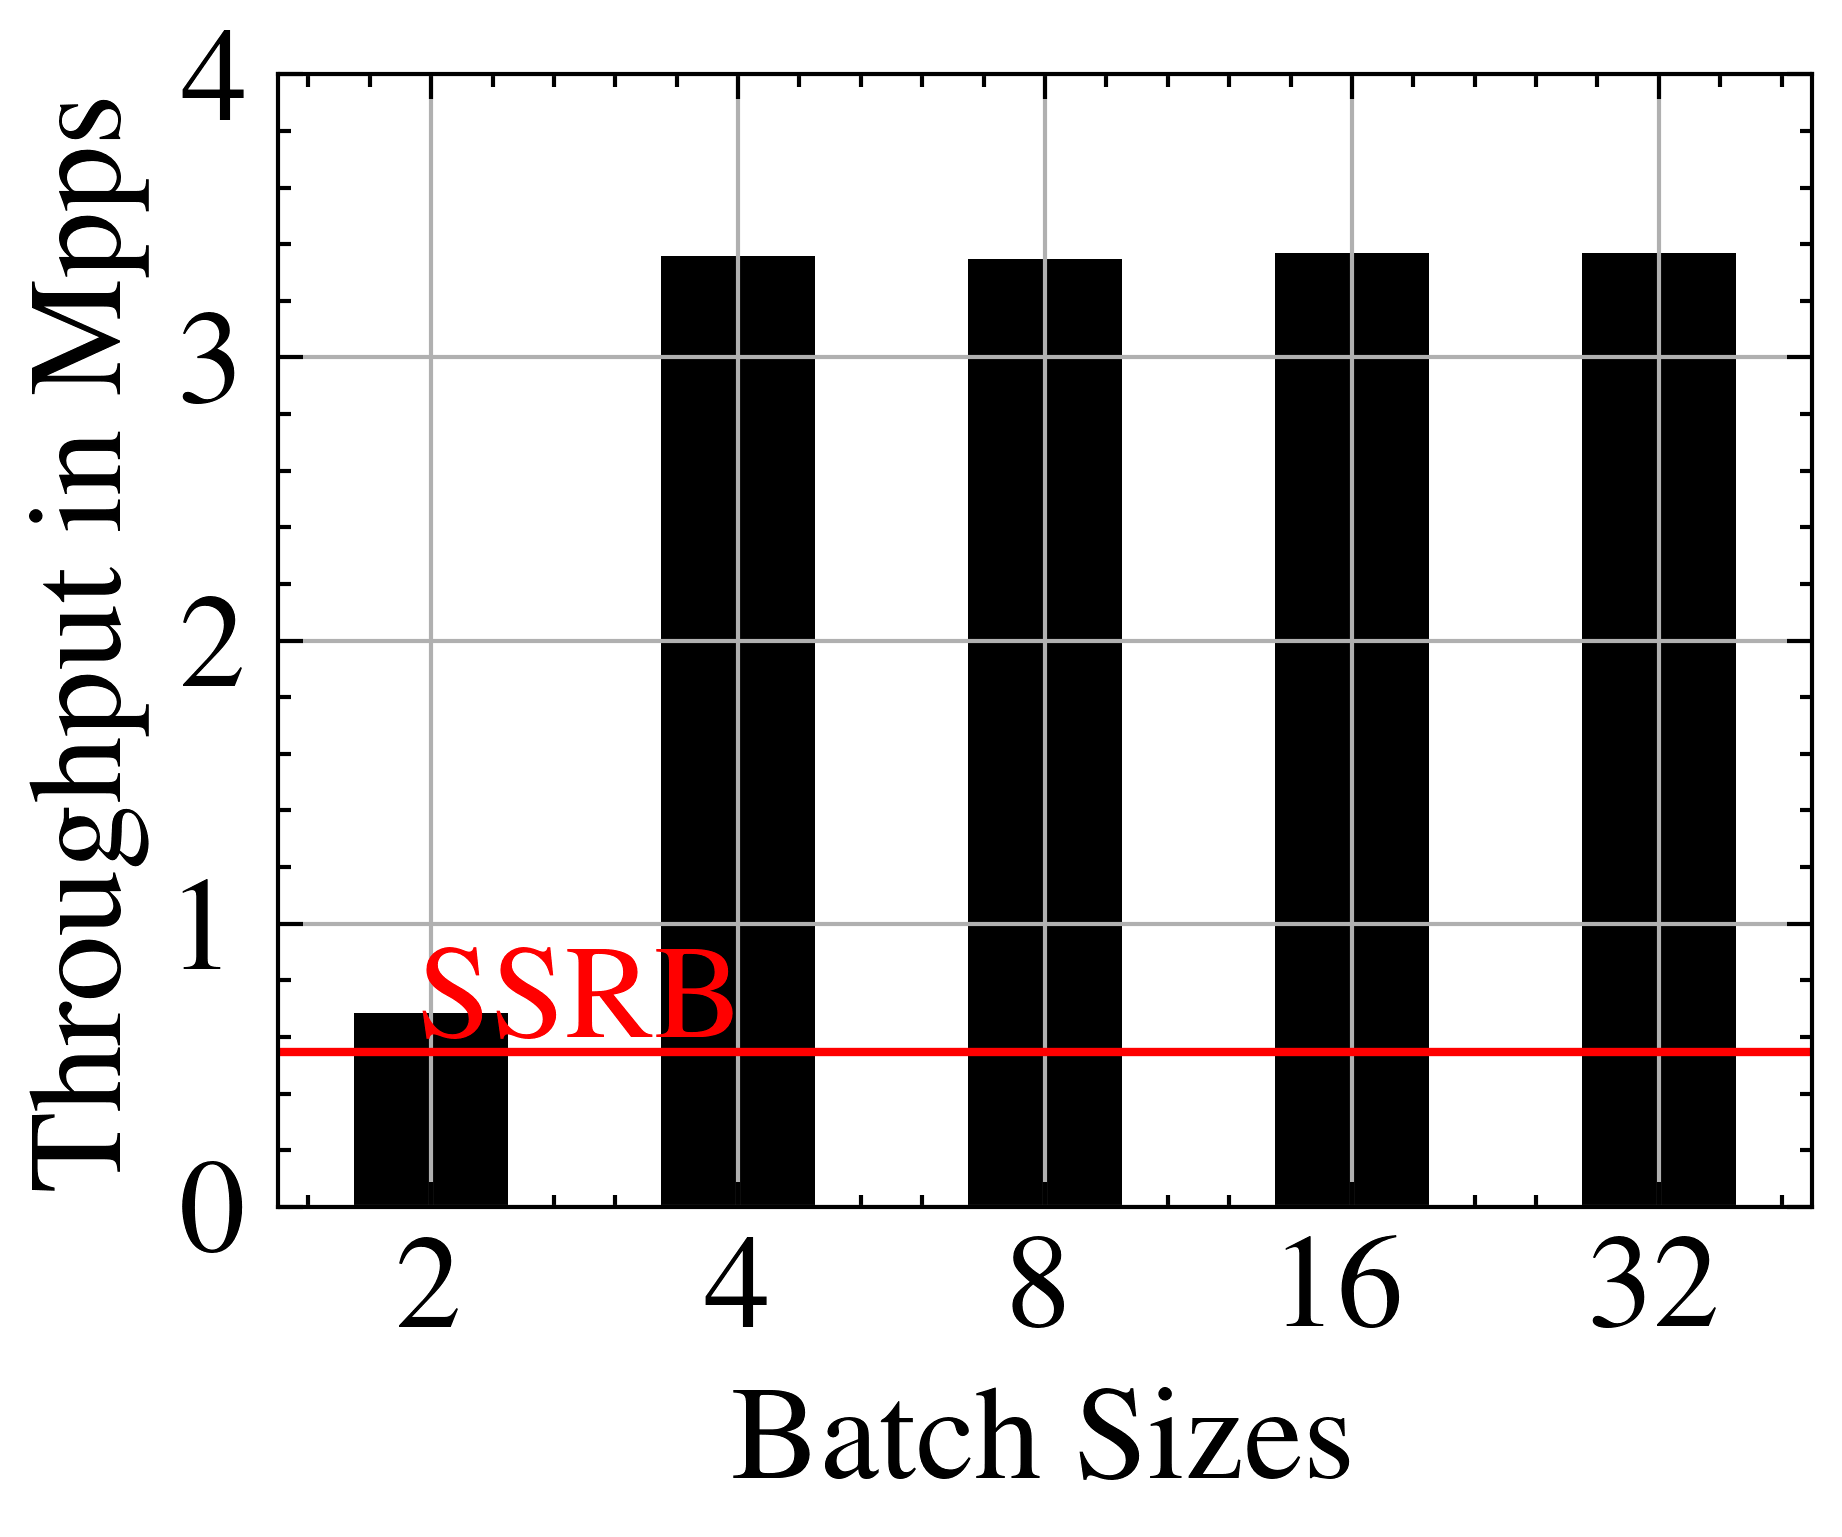

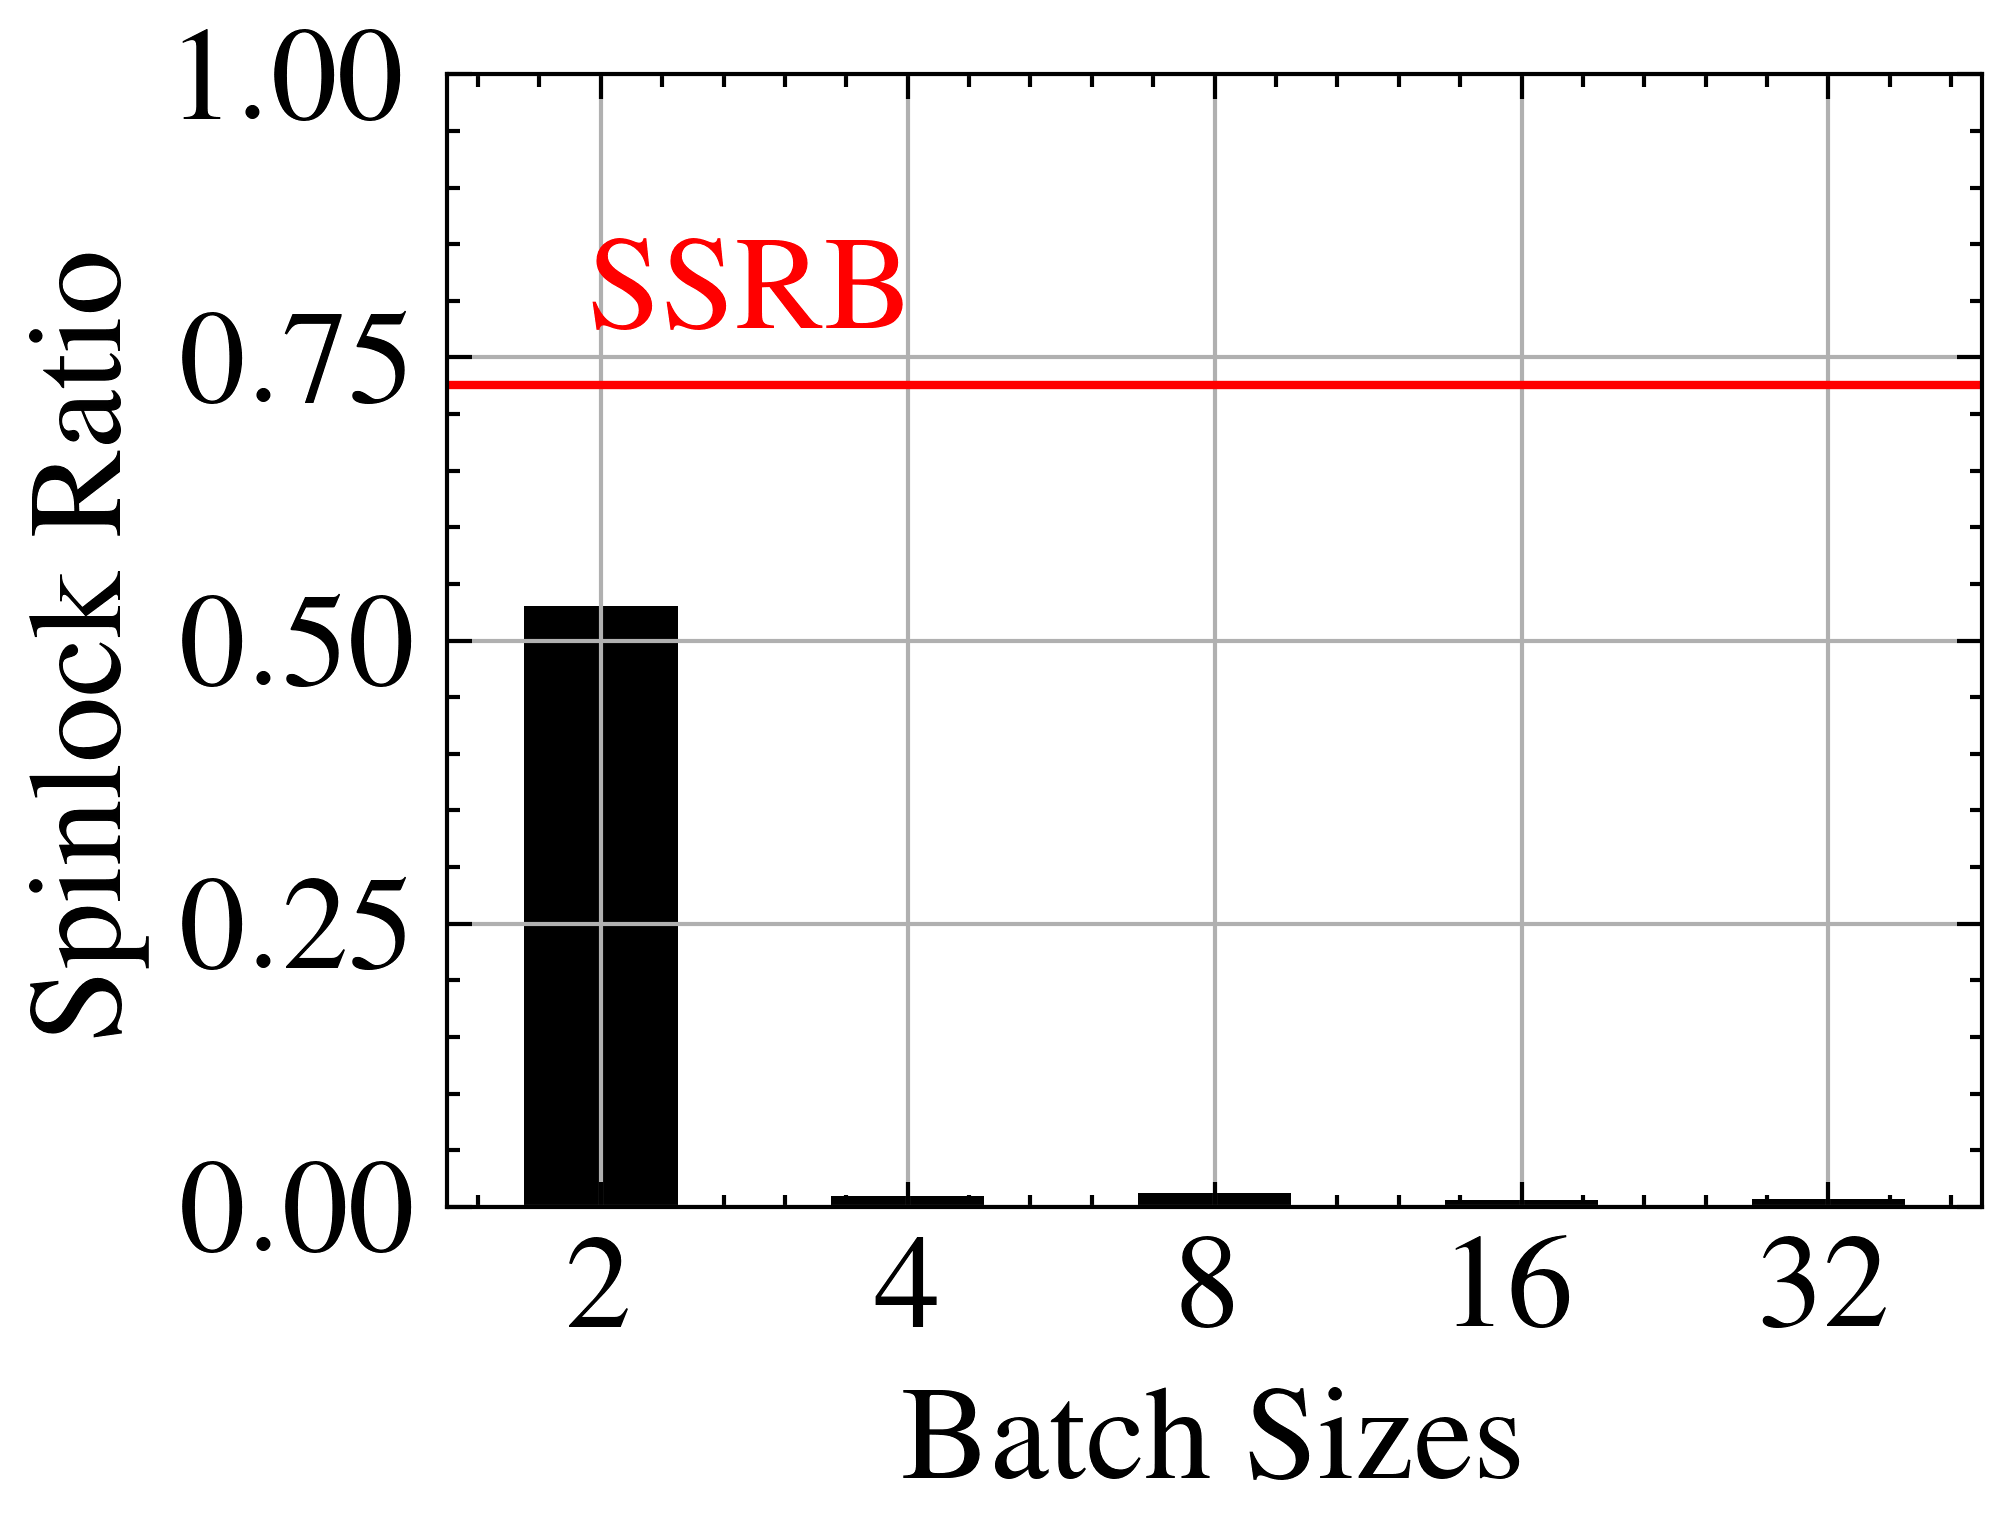

In [156]:
metric = 'throughput'
ylabel = 'Throughput in Mpps'
ylim = [0, 4]

normal_value = df_ssrb[metric].iloc[0]
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    ax = df_ssrb_bc.plot.bar(
        x='batch', y=metric, legend=None,
        xlabel='Batch Sizes', ylabel=ylabel, grid=True, ylim=ylim
    )
    ax.axhline(y=normal_value, color='r', linestyle='-', label='VANILLA')
    ax.annotate('SSRB', 
            xy=(0, normal_value),  # Position where the arrow points
            xytext=(.5, normal_value + .05),  # Position of the text
            ha='center', color='red')
    plt.xticks(rotation=0)
    plt.savefig('poc-ssrb-bc-tp.pdf', dpi=400)
    plt.show()
    
metric = 'spinlock_ratio'
ylabel = 'Spinlock Ratio'
ylim = [0, 1]

normal_value = df_ssrb[metric].iloc[0]
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    ax = df_ssrb_bc.plot.bar(
        x='batch', y=metric, legend=None,
        xlabel='Batch Sizes', ylabel=ylabel, grid=True, ylim=ylim
    )
    ax.axhline(y=normal_value, color='r', linestyle='-', label='VANILLA')
    ax.annotate('SSRB', 
            xy=(0, normal_value),  # Position where the arrow points
            xytext=(.5, normal_value + .05),  # Position of the text
            ha='center', color='red')
    plt.xticks(rotation=0)
    plt.savefig('poc-ssrb-bc-spin.pdf', dpi=400)
    plt.show()

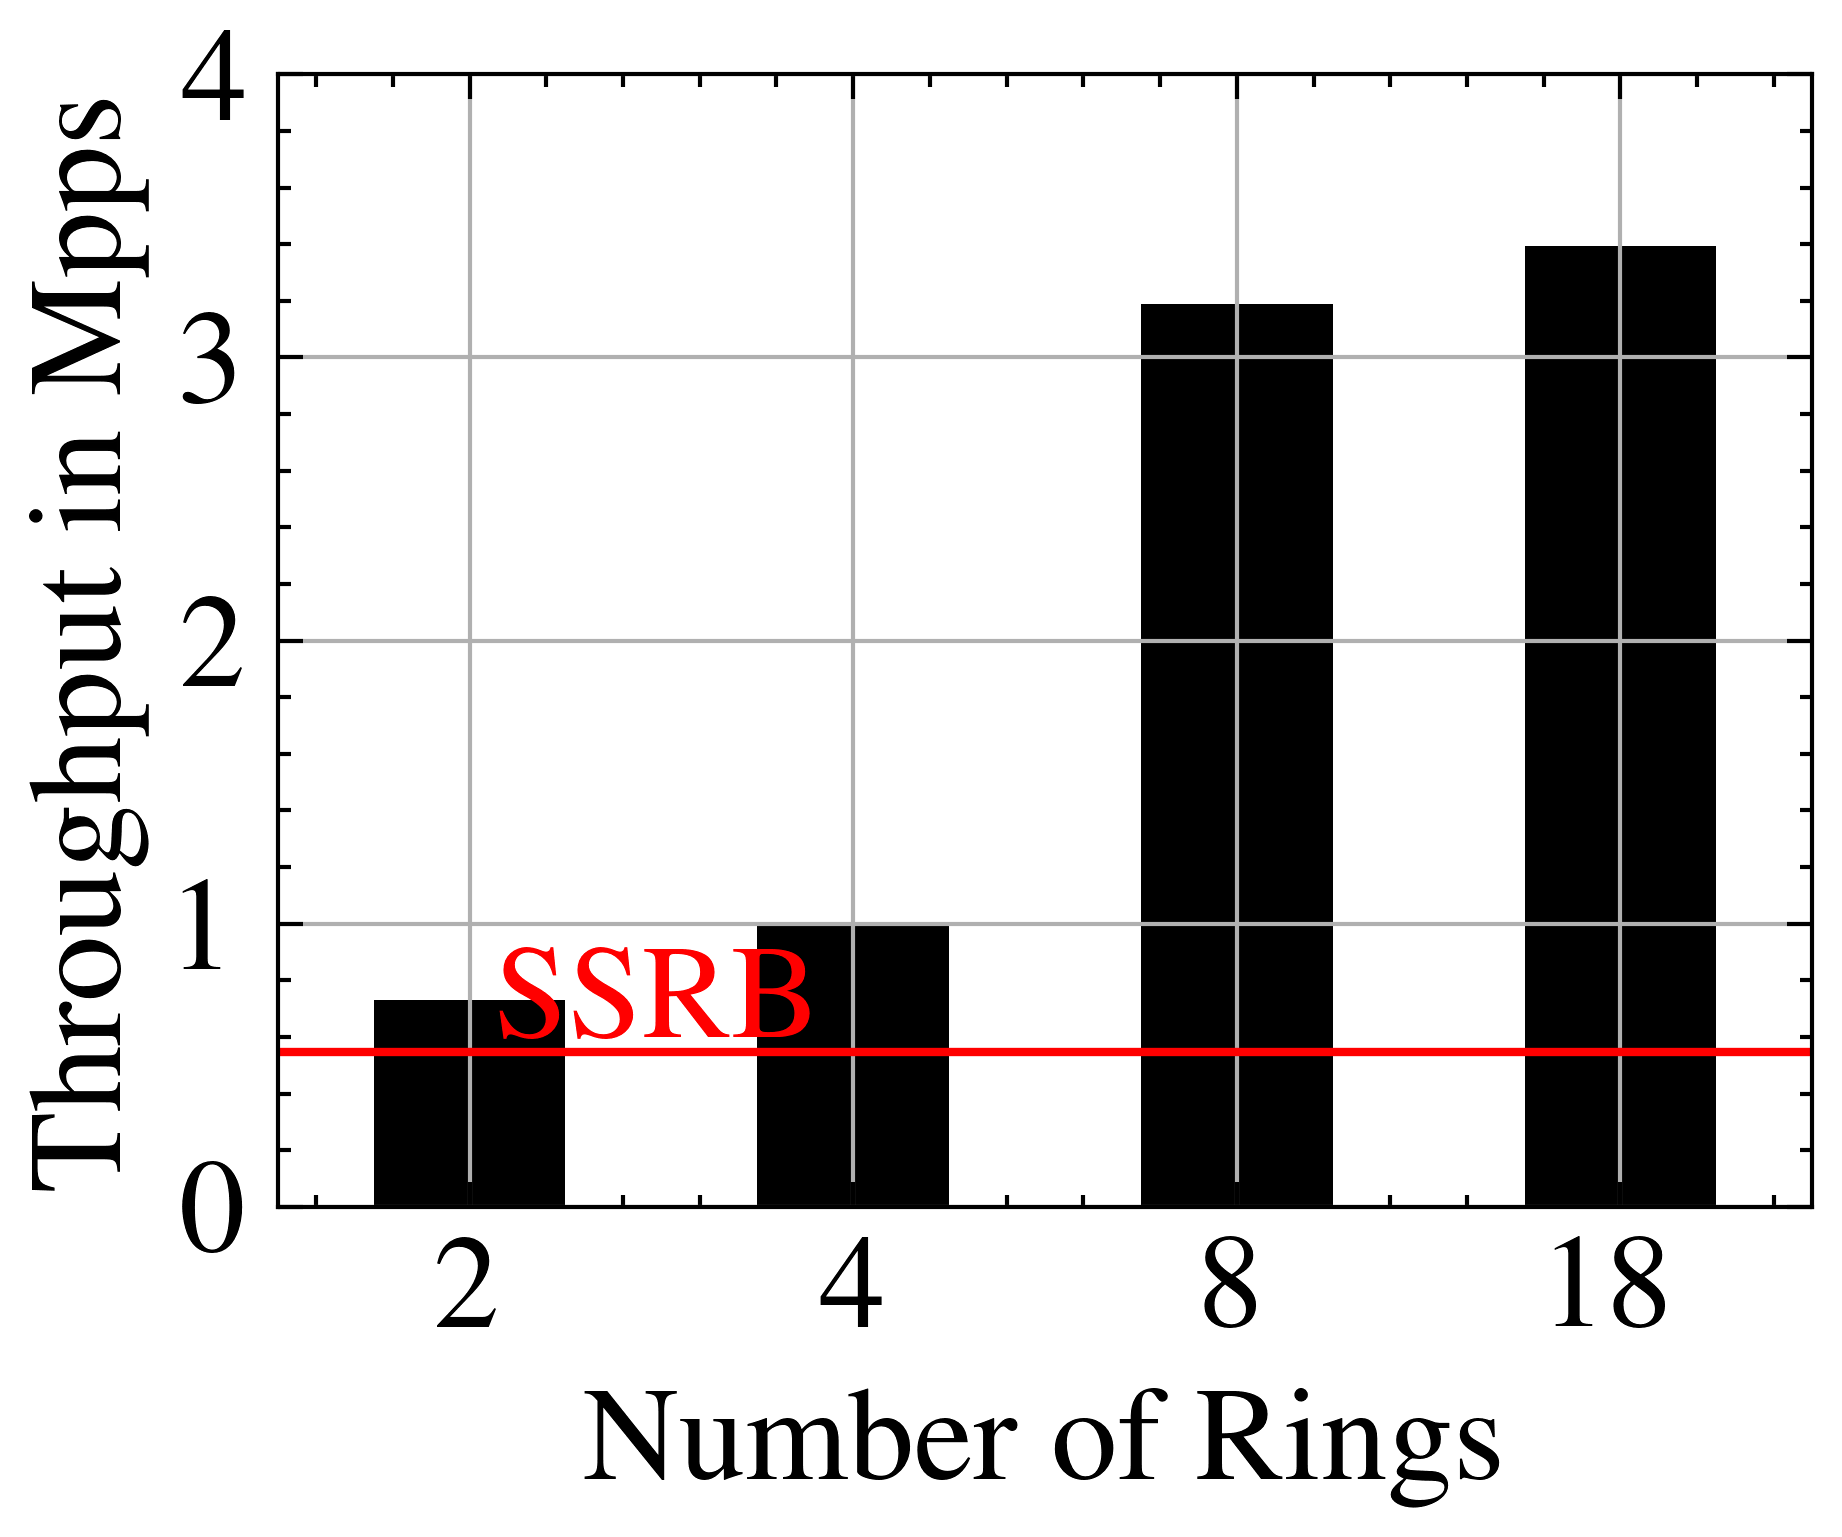

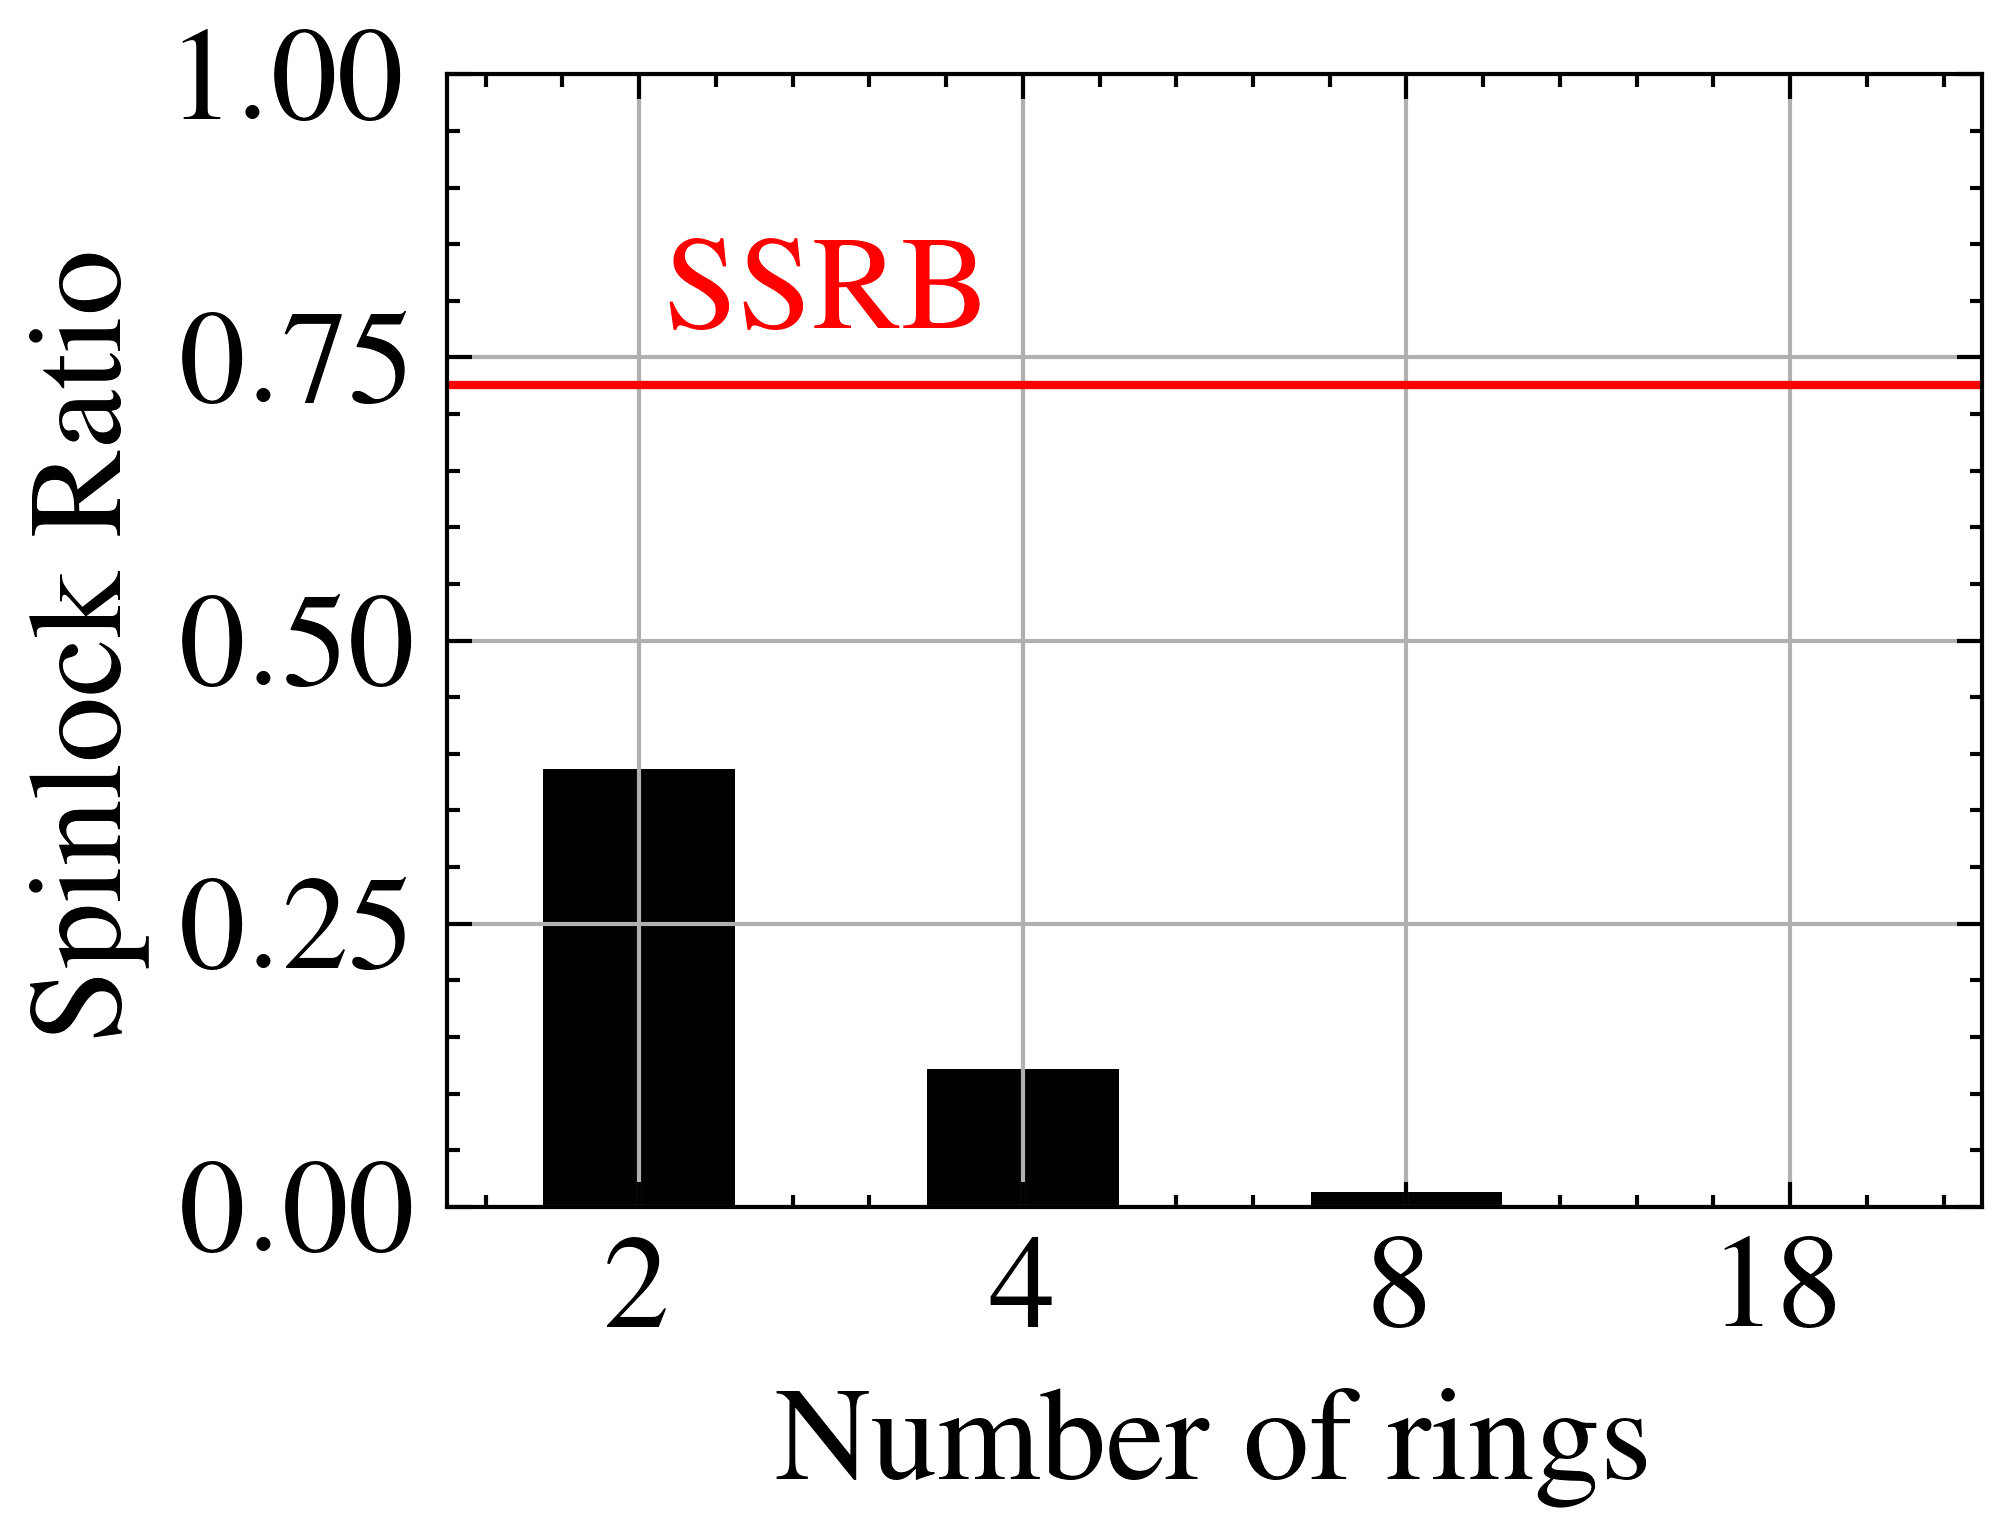

In [160]:
metric = 'throughput'
ylabel = 'Throughput in Mpps'
ylim = [0, 4]

normal_value = df_ssrb[metric].iloc[0]
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    ax = df_mrb.plot.bar(
        x='rings', y=metric, legend=None,
        xlabel='Number of Rings', ylabel=ylabel, grid=True, ylim=ylim
    )
    ax.axhline(y=normal_value, color='r', linestyle='-', label='VANILLA')
    ax.annotate('SSRB', 
            xy=(0, normal_value),  # Position where the arrow points
            xytext=(.5, normal_value + .05),  # Position of the text
            ha='center', color='red')
    plt.xticks(rotation=0)
    plt.savefig('poc-mrb-tp.pdf', dpi=400)
    plt.show()
    
metric = 'spinlock_ratio'
ylabel = 'Spinlock Ratio'
ylim = [0, 1]

normal_value = df_ssrb[metric].iloc[0]
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    ax = df_mrb.plot.bar(
        x='rings', y=metric, legend=None,
        xlabel='Number of rings', ylabel=ylabel, grid=True, ylim=ylim
    )
    ax.axhline(y=normal_value, color='r', linestyle='-', label='VANILLA')
    ax.annotate('SSRB', 
            xy=(0, normal_value),  # Position where the arrow points
            xytext=(.5, normal_value + .05),  # Position of the text
            ha='center', color='red')
    plt.xticks(rotation=0)
    plt.savefig('poc-mrb-spin.pdf', dpi=400)
    plt.show()

In [158]:
best_ssrb_bc = df_ssrb_bc[df_ssrb_bc.batch == 8]
best_mrb = df_mrb[df_mrb.rings == 8]

In [159]:
df = pd.concat([df_ssrb, df_nrb, best_ssrb_bc, best_mrb], axis=0)

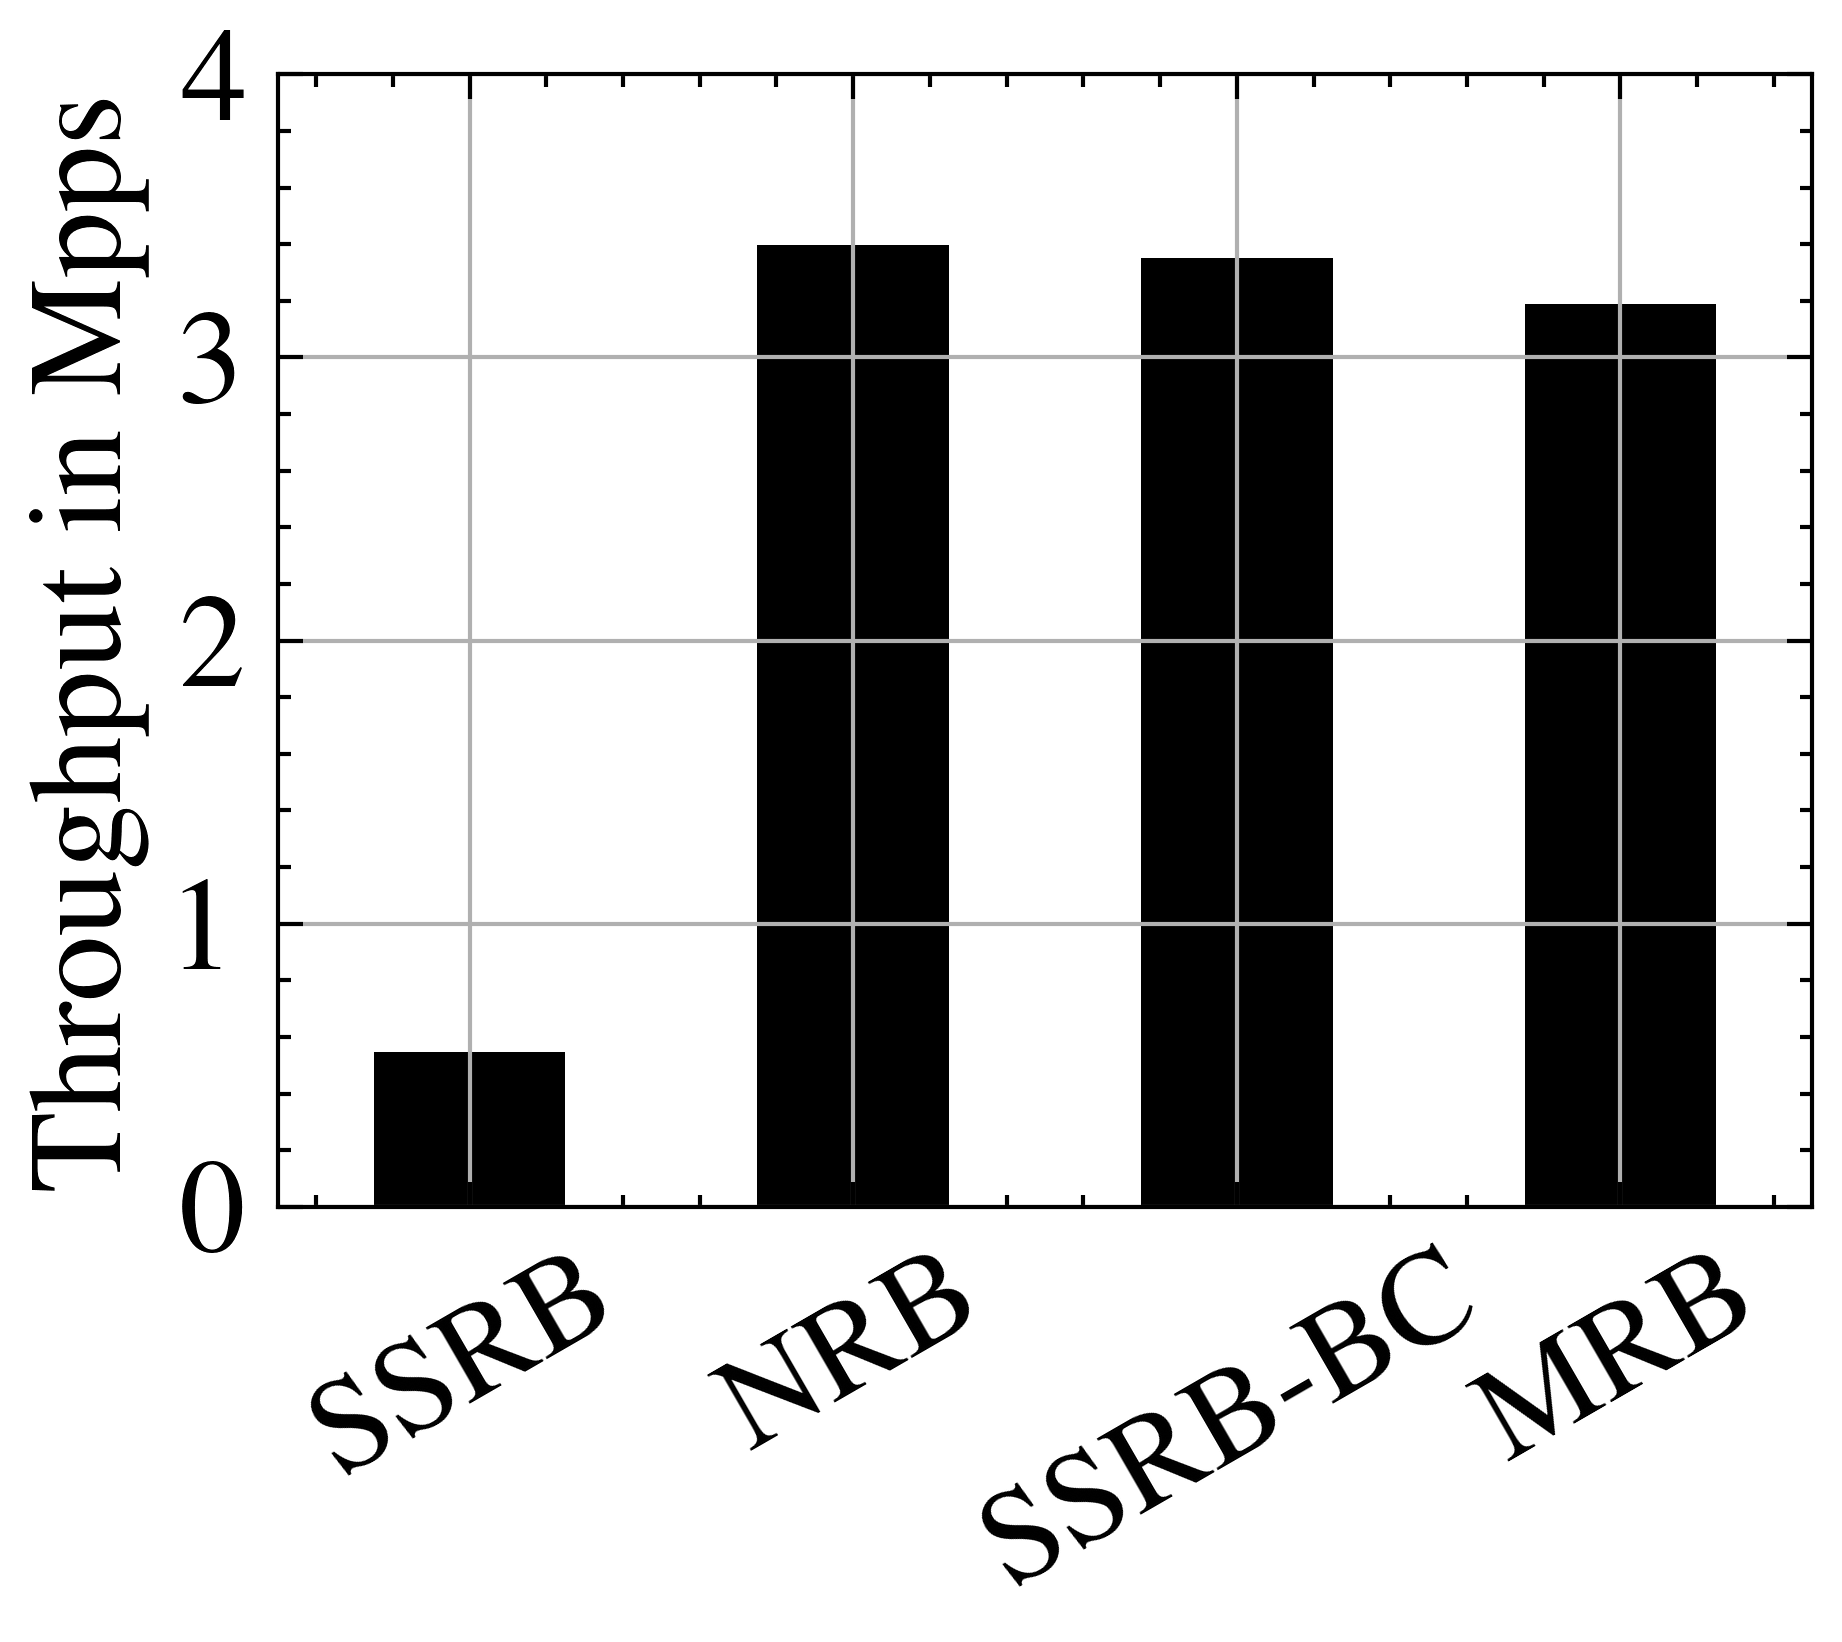

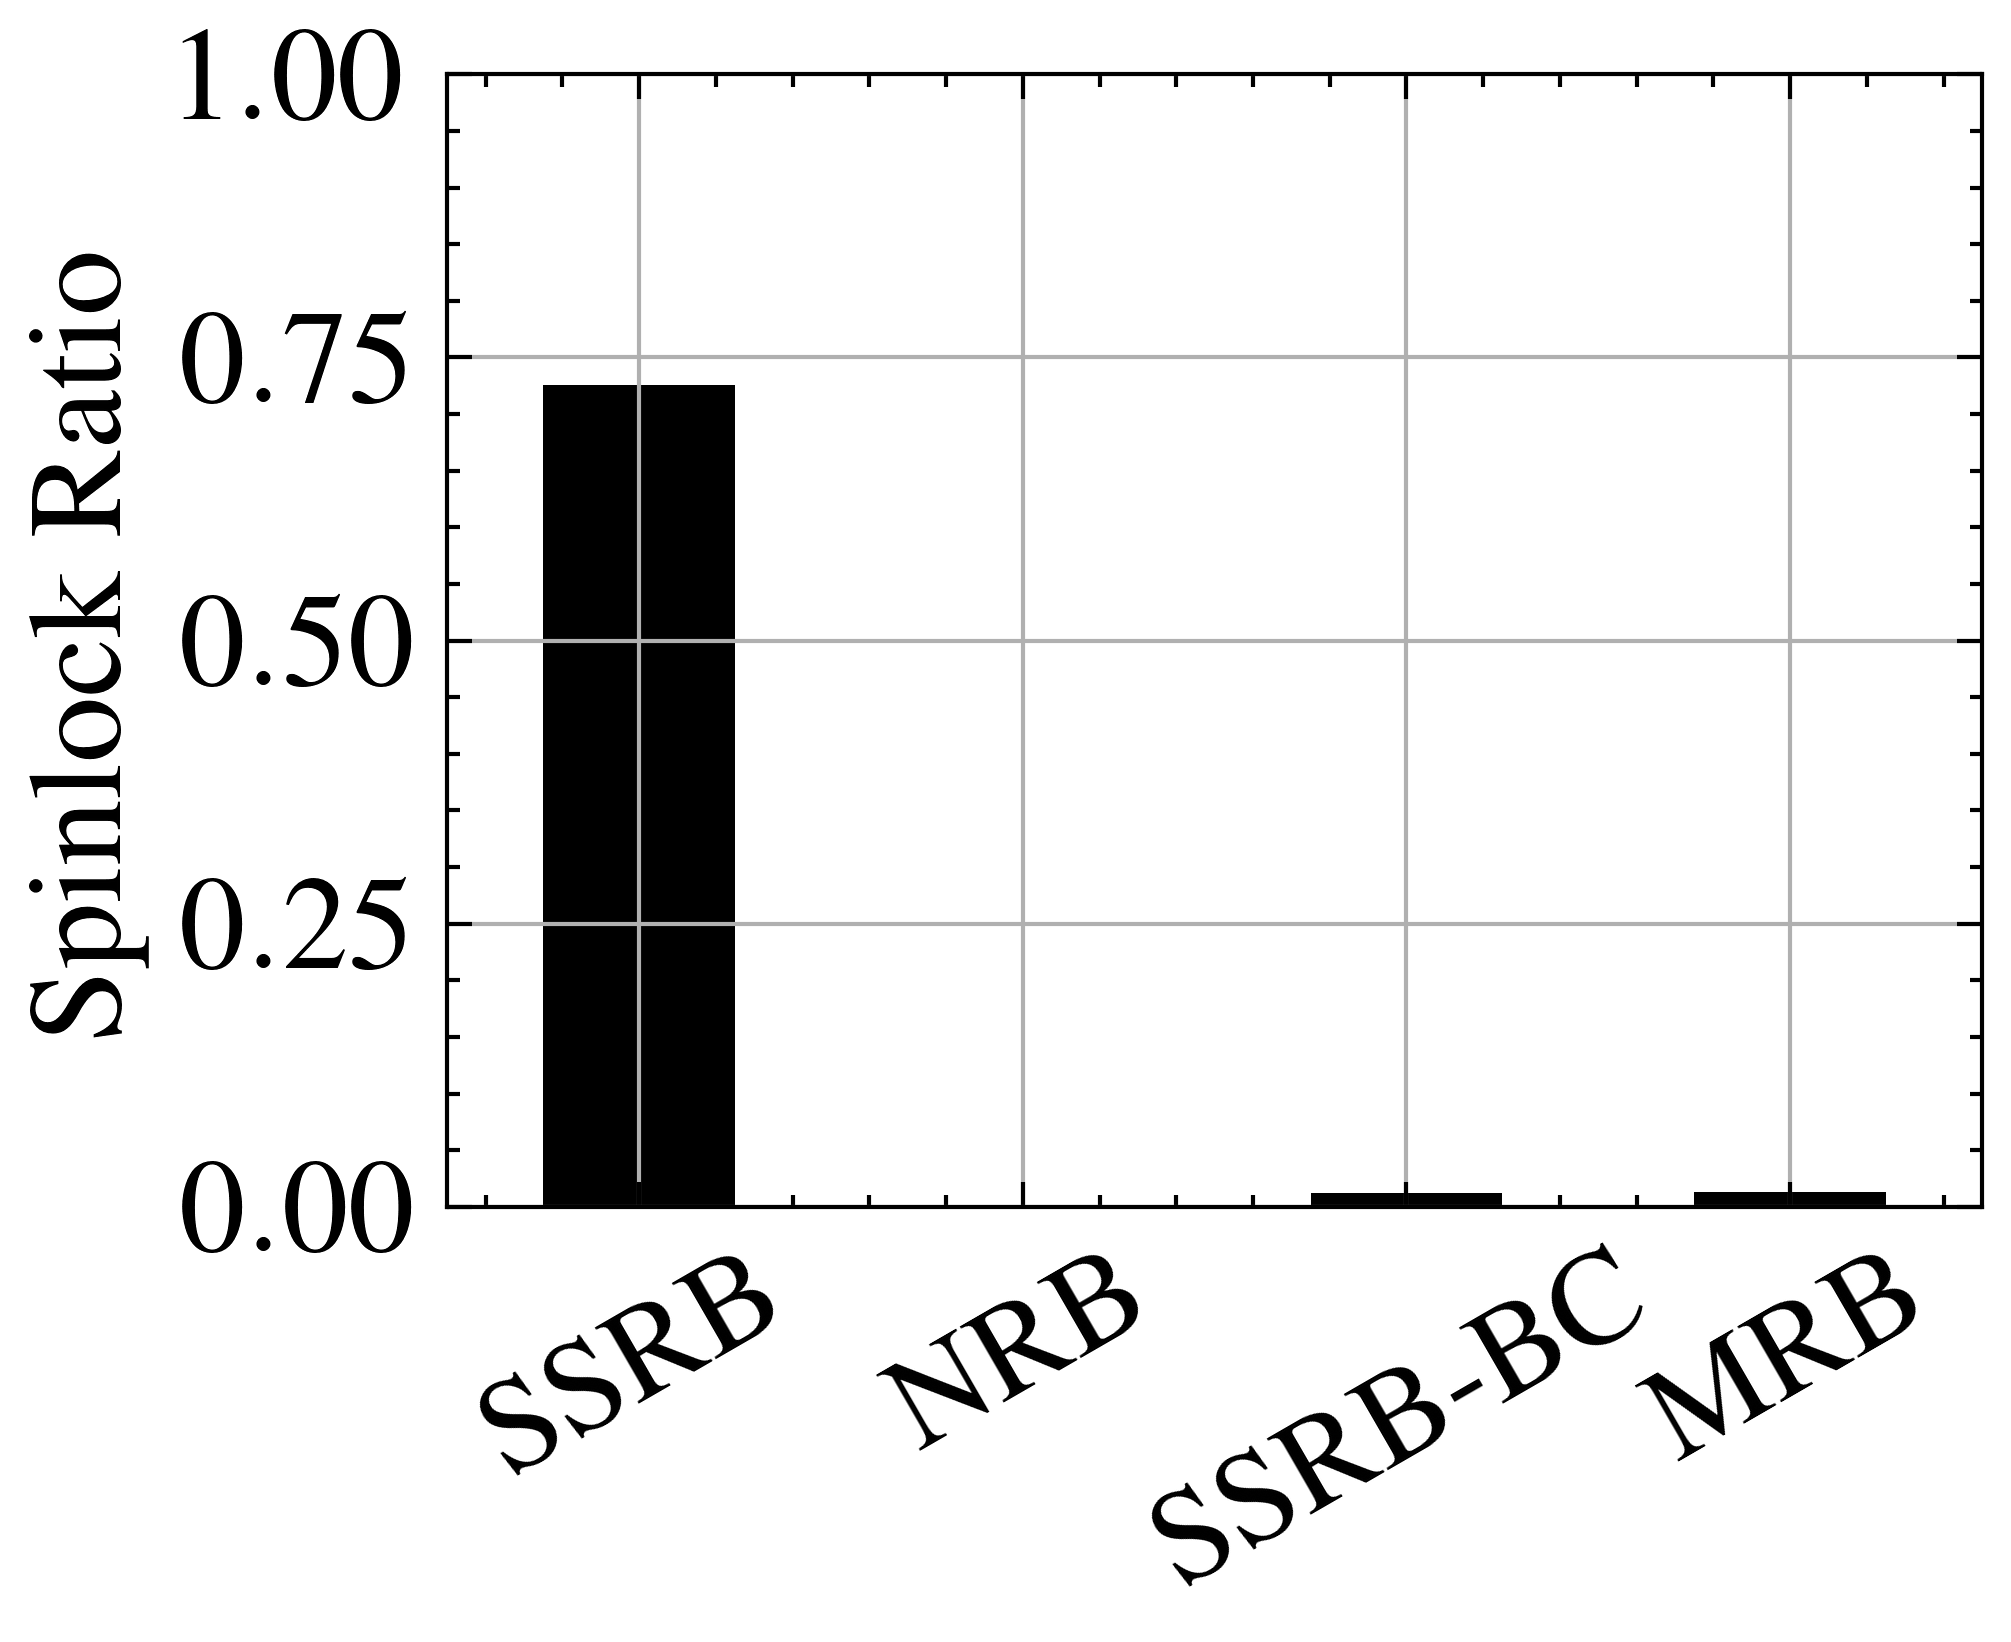

In [162]:
metric = 'throughput'
ylabel = 'Throughput in Mpps'
ylim = [0, 4]

with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    df.plot.bar(
        x='variant', y=metric, legend=None,
        xlabel='', ylabel=ylabel, grid=True, ylim=ylim
    )
    plt.xticks(rotation=30)
    plt.savefig('poc-tp.pdf', dpi=400)
    plt.show()
    
metric = 'spinlock_ratio'
ylabel = 'Spinlock Ratio'
ylim = [0, 1]

normal_value = df_ssrb[metric].iloc[0]
with plt.style.context(['science', 'ieee']):
    plt.rcParams.update({'font.size': fontsize})
    df.plot.bar(
        x='variant', y=metric, legend=None,
        xlabel='', ylabel=ylabel, grid=True, ylim=ylim
    )
    plt.xticks(rotation=30)
    plt.savefig('poc-spin.pdf', dpi=400)
    plt.show()